In [2]:
import numpy as np
import pandas as pd

In [3]:
temp0 = pd.read_csv(filepath_or_buffer=r'archive\aggregate\agg_match_stats_0.csv')
print('final0 complete')
temp1 = pd.read_csv(filepath_or_buffer=r'archive\aggregate\agg_match_stats_1.csv')
print('final1 complete')
temp2 = pd.read_csv(filepath_or_buffer=r'archive\aggregate\agg_match_stats_2.csv')
print('final2 complete')
temp3 = pd.read_csv(filepath_or_buffer=r'archive\aggregate\agg_match_stats_3.csv')
print('final3 complete')
temp4 = pd.read_csv(filepath_or_buffer=r'archive\aggregate\agg_match_stats_4.csv')
print('final4 complete')

final0 complete
final1 complete
final2 complete
final3 complete
final4 complete


In [4]:
data = pd.concat([temp0, temp1, temp2, temp3, temp4])

In [5]:
def conditions():
    condition = [
    (data['team_placement'] <= 10), 
    (data['team_placement'] > 10)]
    return condition

values = ['Top_10', 'remain']
data['ranking'] = np.select(conditions(), values, default='Unknown')

In [6]:
data.isnull().sum()

date                       0
game_size                  0
match_id                   0
match_mode                 0
party_size                 0
player_assists             0
player_dbno                0
player_dist_ride           0
player_dist_walk           0
player_dmg                 0
player_kills               0
player_name            97653
player_survive_time        0
team_id                    0
team_placement             0
ranking                    0
dtype: int64

In [7]:
data.columns

Index(['date', 'game_size', 'match_id', 'match_mode', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement', 'ranking'],
      dtype='object')

In [8]:
data['player_dist_ride'] /= data['player_survive_time']
data['player_dist_walk'] /= data['player_survive_time']
data['player_dmg'] /= data['player_survive_time']
data['player_kills'] /= data['player_survive_time']

In [9]:
df = data[['player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_kills', 'ranking']]
df

,player_dist_ride,player_dist_walk,player_dmg,player_kills,ranking
0,2.594841,1.613320,0.105756,0.000904,remain
1,2.656031,1.587323,0.114796,0.000904,remain
2,0.000000,0.951602,0.284431,0.000000,remain
3,0.000000,0.470431,0.000000,0.000000,remain
4,1.703471,1.632816,0.113822,0.001301,remain
...,...,...,...,...,...
11993480,0.000000,1.448039,0.177790,0.000000,remain
11993481,0.000000,0.676878,0.000000,0.000000,remain
11993482,0.000000,0.177560,0.000000,0.000000,remain
11993483,0.000000,0.000000,0.000000,0.000000,remain


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.index = range(len(df))

In [64]:
temp = df[~df.isin([np.inf, -np.inf]).any(axis=1)]

In [14]:
temp.groupby(by='ranking').mean()

,player_dist_ride,player_dist_walk,player_dmg,player_kills
ranking,,,,
Top_10,1.672639,1.693325,0.152960,0.001128
remain,0.720766,1.231510,0.215284,0.001289


In [15]:
temp.groupby(by='ranking').max()

,player_dist_ride,player_dist_walk,player_dmg,player_kills
ranking,,,,
Top_10,2309.345647,2484.325833,209.140201,1.705757
remain,663.549820,1496.187135,9.195398,0.092293


In [16]:
temp.groupby(by='ranking').std().sample()

,player_dist_ride,player_dist_walk,player_dmg,player_kills
ranking,,,,
Top_10,1.737417,3.386307,0.187212,0.001671
remain,1.690034,4.691297,0.294507,0.002531


In [65]:
remain_samples = temp.query("ranking == 'remain'").sample(5000)
top10_samples = temp.query("ranking == 'Top_10'").sample(n=len(remain_samples), replace=True)

# 두 개의 DataFrame을 합치기
result_df = pd.concat([remain_samples, top10_samples])

print(result_df)

          player_dist_ride  player_dist_walk  player_dmg  player_kills ranking
2275047           0.668289          1.268475    0.000000      0.000000  remain
8248718           0.000000          2.643234    0.180443      0.000000  remain
9579992           0.000000          0.794143    0.000000      0.000000  remain
10345488          0.000000          1.757519    0.096217      0.000000  remain
488028            0.000000          1.998754    0.482393      0.004171  remain
...                    ...               ...         ...           ...     ...
4193712           2.994998          1.221535    0.061485      0.000000  Top_10
4876616           1.837319          1.948011    0.243716      0.001819  Top_10
2403217           2.722614          1.171158    0.269045      0.002795  Top_10
7629433           2.702633          1.309389    0.098573      0.001341  Top_10
4781561           0.000000          0.232542    0.000000      0.000000  Top_10

[10000 rows x 5 columns]


(0.0, 5.0)

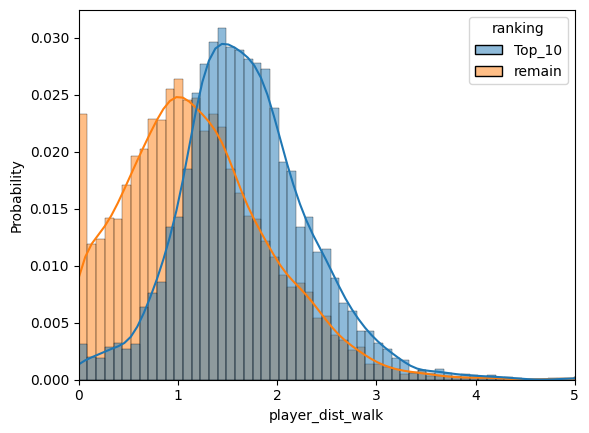

In [66]:
sns.histplot(result_df, x = 'player_dist_walk', hue='ranking', hue_order=['Top_10', 'remain'], stat = 'probability', kde = True)
plt.xlim([0, 5])

(0.0, 5.0)

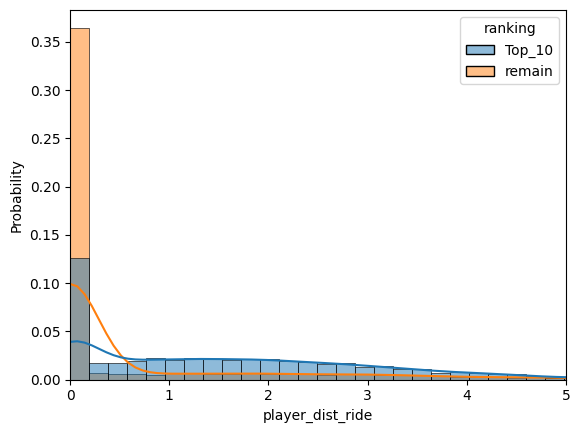

In [69]:

sns.histplot(result_df, x = 'player_dist_ride', hue='ranking', hue_order=['Top_10', 'remain'], stat = 'probability', kde = True)
plt.xlim([0, 5])

In [76]:
result_df['walk+ride'] = result_df['player_dist_ride'] + result_df['player_dist_walk']

(0.0, 12.0)

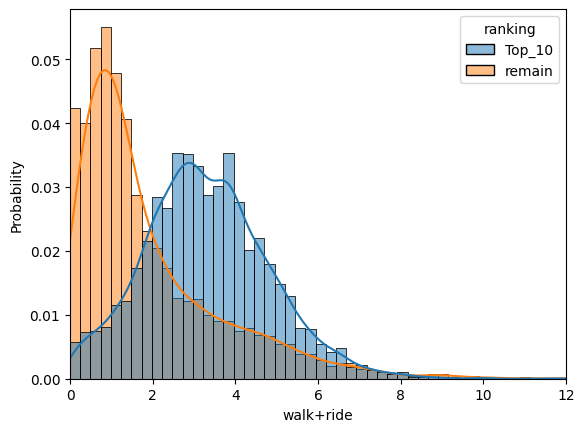

In [78]:

sns.histplot(result_df, x = 'walk+ride', hue='ranking', hue_order=['Top_10', 'remain'], stat = 'probability', kde = True)
plt.xlim([0, 12])

(0.0, 1.0)

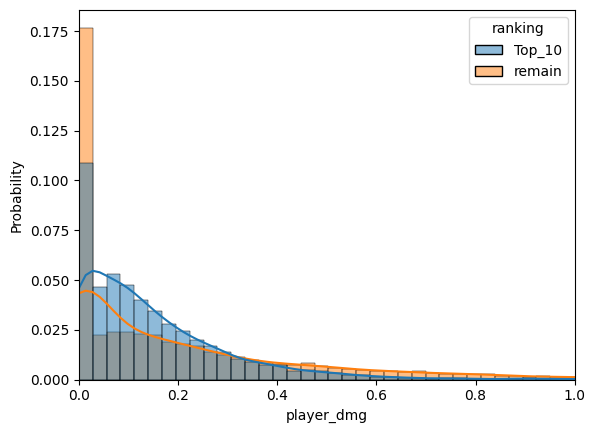

In [89]:

sns.histplot(result_df, x = 'player_dmg', hue='ranking', hue_order=['Top_10', 'remain'], stat = 'probability', kde = True, bins=100)
plt.xlim([0, 1])

(0.0, 0.01)

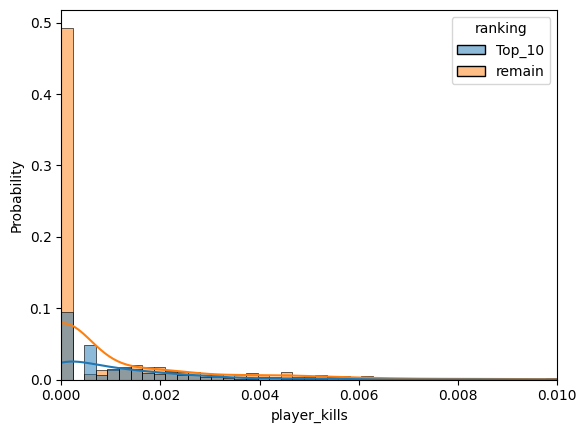

In [100]:
sns.histplot(temp.sample(1000), x = 'player_kills', hue='ranking', hue_order=['Top_10', 'remain'], stat = 'probability', kde = True, bins = 75)
plt.xlim([0, 0.01])

(0.0, 0.02)

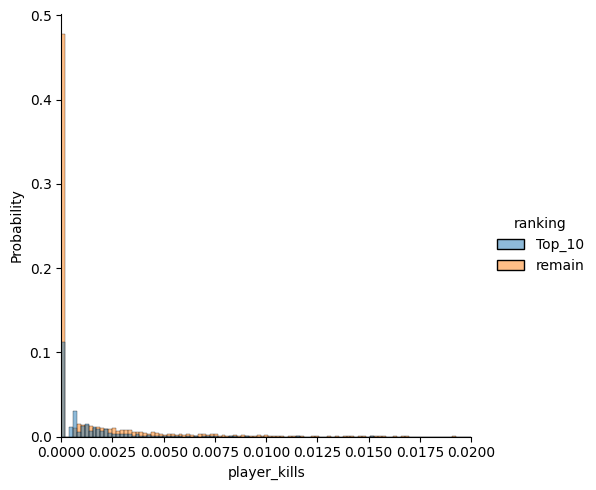

In [31]:
sns.displot(temp.sample(n=5000), x = 'player_kills', stat = 'probability', hue='ranking', hue_order=['Top_10', 'remain'])
plt.xlim([0, 0.02])